In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [ ]:
!git clone https://github.com/Minhajul-Abidin/Image_Data.git

Cloning into 'Image_Data'...
remote: Enumerating objects: 424, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 424 (delta 3), reused 158 (delta 3), pack-reused 256
Receiving objects: 100% (424/424), 17.80 MiB | 29.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
data = pd.read_csv('/content/Image_Data/train.csv')

In [ ]:
data.head()

,Image,Organized,Maturity,Confidence,Attentiveness,Adaptiveness,Ambivert
0,Image_1,0,1,1,0,0,1
1,Image_2,1,0,1,1,1,0
2,Image_3,1,1,0,0,0,1
3,Image_4,1,1,0,1,0,1
4,Image_5,1,1,1,0,1,0


In [ ]:
data.shape

(70, 7)

In [ ]:
img_width = 350
img_height = 350
X=[]
for i in tqdm(range(data.shape[0])):
  path="/content/Image_Data/Project_Img/" +data['Image'][i]+ '.jpg'
  img = image.load_img(path,target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img =img/255.0
  X.append(img)

X = np.array(X)



100%|██████████| 70/70 [00:01<00:00, 60.46it/s]


In [ ]:
X.shape

(70, 350, 350, 3)

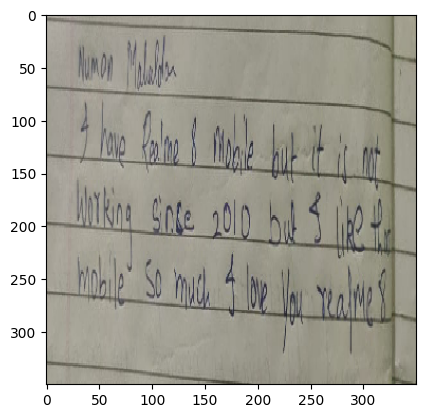

In [ ]:
plt.imshow(X[1])

In [ ]:
y = data.drop(['Image'],axis=1)
y = y.to_numpy()
y.shape

(70, 6)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 5, test_size =0.5)

In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 173, 173, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1915456)           0         
                                                                 
 dense (Dense)               (None, 128)               245178496 
                                                        

In [ ]:
 model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics ='accuracy')

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
2/2 [==============================] - 16s 969ms/step - loss: 7.0799 - accuracy: 0.0857 - val_loss: 41.3289 - val_accuracy: 0.3714
Epoch 2/50
2/2 [==============================] - 1s 206ms/step - loss: 51.4802 - accuracy: 0.2571 - val_loss: 12.0003 - val_accuracy: 0.3714
Epoch 3/50
2/2 [==============================] - 1s 208ms/step - loss: 24.4207 - accuracy: 0.2857 - val_loss: 1.7351 - val_accuracy: 0.3714
Epoch 4/50
2/2 [==============================] - 1s 254ms/step - loss: 6.0465 - accuracy: 0.1429 - val_loss: 2.6471 - val_accuracy: 0.5714
Epoch 5/50
2/2 [==============================] - 1s 222ms/step - loss: 2.0191 - accuracy: 0.2857 - val_loss: 1.0237 - val_accuracy: 0.3714
Epoch 6/50
2/2 [==============================] - 1s 211ms/step - loss: 1.3503 - accuracy: 0.3143 - val_loss: 0.7902 - val_accuracy: 0.0571
Epoch 7/50
2/2 [==============================] - 1s 212ms/step - loss: 0.6202 - accuracy: 0.4000 - val_loss: 0.7021 - val_accuracy: 0.4571
Epoch 8/50
2/2 

Index(['Organized', 'Maturity', 'Confidence', 'Attentiveness', 'Adaptiveness',
       'Ambivert'],
      dtype='object')
1/1 [==============================] - 0s 227ms/step
Ambivert
Organized
Attentiveness


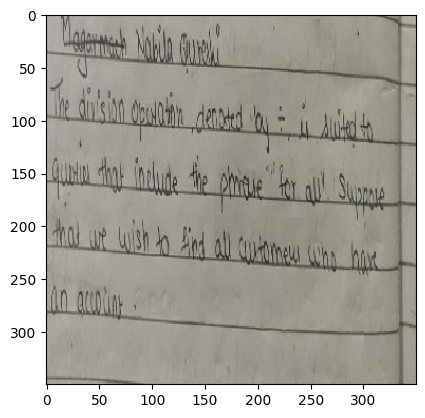

In [ ]:
img = image.load_img('test_6.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[1:]
print(classes)
y_prob = model.predict(img)
top1 = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top1[i]])